In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


Loading the Data

In [ ]:
# test=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
# train=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
# X=train.drop('Rating',axis=1)
# y=train['Rating']

In [ ]:
# train

In [ ]:
# test

Creating an exploration set for EDA

In [ ]:
# exploration_set=train.copy()
exploration_set

Dummy Classifier Code

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.dummy import DummyClassifier

In [ ]:
# dClass=DummyClassifier(strategy="most_frequent")
# dClass.fit(X,y)
# dClass.predict(X)
# y_pred=dClass.predict(test)

In [ ]:
# y_pred.shape
# id=[]
# for i in range(y_pred.shape[0]):
#     id.append(i)
# dummy_pred=pd.DataFrame(id,columns=['ID'])
# dummy_pred['Rating']=y_pred
# # dummy_pred
# dummy_pred.to_csv("submission.csv",encoding='utf-8',index=False)


Performing EDA

In [ ]:
# train.info()
# train.head()

In [ ]:
# train.isnull().sum()

In [ ]:
# train[train['Recipe_Review'].isnull()==True]

In [ ]:
# """No need to apply imputer, we can drop the 2 cells"""

# train=train.dropna()
# train.isnull().sum()

In [ ]:
# count=[(i,train[i].unique().shape[0]) for i in train.columns]
# count

In [ ]:
# """Drop Comment ID as it is unique and does not provide any insights"""
# train=train.drop('CommentID',axis=1)

In [ ]:
# sns.scatterplot(data=train,x="Rating",y="BestScore",hue="ReplyCount")

In [ ]:
# train.info()
# train

In [ ]:
# """It is best to onehotencode columns such as """
# print((train.columns).dtype)

In [ ]:
# train.columns

In [ ]:
# train[train["Recipe_Review"]==np.nan]

In [ ]:
# train.info()

In [ ]:
# train['Recipe_Review']

Importing the libraries

In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn.decomposition import PCA
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.decomposition import TruncatedSVD
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

In [ ]:
# train=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
# train

In [ ]:
# train.drop(["CommentID","CreationTimestamp"],axis=1,inplace=True)
# train

In [ ]:
# test.drop(["CommentID","CreationTimestamp"],axis=1,inplace=True)

In [ ]:
# train=train.dropna()

In [ ]:
# train.shape

In [ ]:
# X=train.drop("Rating",axis=1)
# y=train["Rating"]

In [ ]:
# X.isnull().sum()

In [ ]:
# X.shape

In [ ]:
# test

In [ ]:
# # encoder = LabelEncoder(sparse=False,handle_unknown="ignore")
# # X_categorical = pd.DataFrame(encoder.fit_transform(pd.concat([
# #     X[["UserID"]],
# #     X[["UserName"]],
# #     X[["RecipeName"]]
# # ], axis=1)))
# # X_categorical
# # test_categorical = pd.DataFrame(encoder.transform(pd.concat([
# #     test[["UserID"]],
# #     test[["UserName"]],
# #     test[["RecipeName"]]
# # ], axis=1)))

# # encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
# # X_categorical = pd.DataFrame(encoder.fit_transform(X[["RecipeName"]]))
# # test_categorical = pd.DataFrame(encoder.transform(test[["RecipeName"]]))

# vectorizer=TfidfVectorizer()
# X_categorical=pd.DataFrame(vectorizer.fit_transform(X["RecipeName"].values.astype('U')).toarray())
# # X_text
# test_categorical=pd.DataFrame(vectorizer.transform(test["RecipeName"].values.astype('U')).toarray())

# label_encoder = LabelEncoder()
# categ=["UserID", "UserName"]

# # X_user_encoded = pd.DataFrame(label_encoder.fit_transform(X[["UserID", "UserName"]]), columns=["UserID", "UserName"])
# # X_categorical = pd.concat([X_recipe_encoded, X_user_encoded], axis=1)
# # test_categorical = pd.concat([test_recipe_encoded, test_user_encoded], axis=1)

# X[categ] = X[categ].apply(label_encoder.fit_transform)
# test[categ] = test[categ].apply(label_encoder.fit_transform)


In [ ]:
# X_categorical.shape

In [ ]:
# X_categorical.isnull().sum()

In [ ]:
# test_categorical.shape

In [ ]:
# vectorizer=TfidfVectorizer()
# X_text=pd.DataFrame(vectorizer.fit_transform(X["Recipe_Review"].values.astype('U')).toarray())
# X_text
# test_text=pd.DataFrame(vectorizer.transform(test["Recipe_Review"].values.astype('U')).toarray())

In [ ]:
# X_text.isnull().sum()

In [ ]:
# X_text.shape

In [ ]:
# test_text.shape

In [ ]:
# null_mask = X.isnull().any(axis=1)
# null_rows = X[null_mask]

# print(null_rows)

In [ ]:
# X

In [ ]:
# X = X.drop(['Recipe_Review','RecipeName'],axis=1)
# test = test.drop(['Recipe_Review','RecipeName'],axis=1)

In [ ]:
# X

In [ ]:
# X_processed = pd.concat([X_text, X_categorical], axis=1)

In [ ]:
# X_processed.shape

In [ ]:
# X_processed.iloc[2984].isnull().sum()

In [ ]:
# X_processed.isnull().sum()

In [ ]:
# X = pd.concat([X.reset_index(drop=True),X_processed.reset_index(drop=True)], axis=1)
# test = pd.concat([test, test_text, test_categorical], axis=1)
# print(X)
# print(test.shape)

In [ ]:
# null_mask = X.isnull().any(axis=1)
# null_rows = X[null_mask]

# print(null_rows)

In [ ]:
# X.columns = X.columns.astype(str)
# test.columns = test.columns.astype(str)

In [ ]:
# X.shape

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# test_scaled=scaler.transform(test)

In [ ]:
# # pca = PCA(n_components=0.95)
# # X_reduced = pca.fit_transform(X_scaled)
# # test_reduced=pca.transform(test_scaled)
# svd = TruncatedSVD(n_components=5000, n_iter=7, random_state=42)
# X_reduced = svd.fit_transform(X_scaled)
# test_reduced = svd.transform(test_scaled)

In [ ]:
# X_reduced.shape

In [ ]:
# print(X_reduced)
# print(test_reduced)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# param_grid_svm = {
#     'C': [1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': [0.1, 0.01]
# }

# svc_model = SVC()
# grid_search_svm = GridSearchCV(svc_model, param_grid_svm, scoring='accuracy', cv=5)
# grid_search_svm.fit(X_train, y_train)

# svm_best_model = grid_search_svm.best_estimator_
# svm_accuracy = grid_search_svm.best_score_
# print("SVM Best Accuracy:", svm_accuracy)

In [ ]:
# from xgboost import XGBClassifier

# param_grid = {
#     'eta': [0.1],
#     'gamma': [0],
#     'n_estimators': [1000],
#     'objective': ['multi:softmax'],
#     'min_child_weight': [4],
#     'max_depth': [8],
#     'eval_metric': ['mlogloss'],
# }

# xgb_model = XGBClassifier()
# grid_search_xgb = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
# grid_search_xgb.fit(X_train, y_train)

# best_xgb_model = grid_search_xgb.best_estimator_
# best_accuracy = grid_search_xgb.best_score_
# print("XGBoost Best Accuracy:", best_accuracy)

In [ ]:
# from lightgbm import LGBMClassifier

# param_grid = {
#     'boosting_type':['gbdt','dart'],
#     'learning_rate': [0.01, 0.1, 1],
#     'n_estimators': [50, 100, 200]
# }

# lgbm_model = LGBMClassifier(objective='multiclass')
# grid_search_lgbm = GridSearchCV(lgbm_model, param_grid, scoring='accuracy', cv=5)
# grid_search_lgbm.fit(X_train, y_train)

# best_lgbm_model = grid_search_lgbm.best_estimator_
# best_accuracy = grid_search_lgbm.best_score_
# print("LightGBM Best Accuracy:", best_accuracy)

In [ ]:
# print(best_lgbm_model)

In [ ]:
# from sklearn.metrics import accuracy_score

# y_pred=best_lgbm_model.predict(X_test)
# accuracy_score(y_test,y_pred)

In [ ]:
# submission=best_lgbm_model.predict(test_scaled)
# id = [i for i in range(1,4547)]
# sub=pd.DataFrame(id,columns=['ID'])
# sub["Rating"]=submission
# sub.to_csv("submission.csv",encoding="utf-8",index=False)


In [ ]:
# param_grid_hist = {
#     "learning_rate": [0.1, 0.01],
#     "tol": [1e-6, 1e-7, 1e-8],
#     "max_depth": [3, 5]
# }
# hist_clf = HistGradientBoostingClassifier()

# grid_search_hist = GridSearchCV(hist_clf,param_grid_hist,scoring='f1_macro', cv=5)
# grid_search_hist.fit(X_train,y_train)

# hist_best_model=grid_search_hist.best_estimator_
# hist_accuracy=grid_search_hist.best_score_
# print(grid_search_hist.best_params_)
# print("HistGradientBoostingClassifier:",hist_accuracy)

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred = hist_best_model.predict(X_test)
# accuracy_score(y_test, y_pred)


In [ ]:
# test_pred=hist_best_model.predict(test_reduced)
# pd.DataFrame(test_pred).to_csv('submission.csv',header=["Rating"],index_label = "ID")
# # test_pred

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# param_grid_knn = {
#     'n_neighbors': range(1, 20),
#     'algorithm': ['auto', 'ball_tree', 'kd_tree']
# }

# knn_model = KNeighborsClassifier()
# grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring='f1_macro', cv=5)
# grid_search_knn.fit(X_train, y_train)

# knn_best_model = grid_search_knn.best_estimator_
# knn_accuracy = grid_search_knn.best_score_
# print(grid_search_knn.best_params_)
# print("KNN Best Accuracy:", knn_accuracy)

In [ ]:
# y_pred = knn_best_model.predict(X_test)
# print(accuracy_score(y_test, y_pred))
# test_pred=hist_best_model.predict(test_reduced)
# pd.DataFrame(test_pred).to_csv('KNN.csv',header=False,index=False)

In [ ]:
# param_grid_rf = {
#     'n_estimators': [200, 300],
#     'max_depth': [4, 6],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf_model = RandomForestClassifier()
# grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='accuracy', cv=5)
# grid_search_rf.fit(X_train, y_train)

# rf_best_model = grid_search_rf.best_estimator_
# rf_accuracy = grid_search_rf.best_score_
# print(grid_search_rf.best_params_)
# print("Random Forest Best Accuracy:", rf_accuracy)

In [ ]:
# y_pred = rf_best_model.predict(X_test)
# print(accuracy_score(y_test, y_pred))
# test_pred=hist_best_model.predict(test)
# pd.DataFrame(test_pred).to_csv('submission.csv')

In [ ]:
# param_grid_dt = {
#     'max_depth': [3, 5, 8],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# dt_model = DecisionTreeClassifier()
# grid_search_dt = GridSearchCV(dt_model, param_grid_dt, scoring='f1_macro', cv=5)  # Use 'f1_macro' for multi-class F1-score
# grid_search_dt.fit(X_train, y_train)

# dt_best_model = grid_search_dt.best_estimator_
# dt_score = grid_search_dt.best_score_
# print(grid_search_dt.best_params_)
# print("Decision Tree Best Score:", dt_score)

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


Loading the Data

In [38]:
test=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
train=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

**Lets Perform EDA on train Data**

In [39]:
exploration_data=train.copy()

In [40]:
count=[(i,train[i].unique().shape[0]) for i in train.columns]
count

[('ID', 701),
 ('RecipeNumber', 100),
 ('RecipeCode', 100),
 ('RecipeName', 100),
 ('CommentID', 13636),
 ('UserID', 10783),
 ('UserName', 10620),
 ('UserReputation', 20),
 ('CreationTimestamp', 2422),
 ('ReplyCount', 4),
 ('ThumbsUpCount', 57),
 ('ThumbsDownCount', 51),
 ('Rating', 6),
 ('BestScore', 525),
 ('Recipe_Review', 13371)]

In [41]:
exploration_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [42]:
exploration_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


Checking for missing values

In [43]:
exploration_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [44]:
exploration_data[exploration_data['Recipe_Review'].isnull()==True]
exploration_data.dropna() #dropping since there is no need to use an imputer

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


In [45]:
exploration_data.dtypes

ID                    int64
RecipeNumber          int64
RecipeCode            int64
RecipeName           object
CommentID            object
UserID               object
UserName             object
UserReputation        int64
CreationTimestamp     int64
ReplyCount            int64
ThumbsUpCount         int64
ThumbsDownCount       int64
Rating                int64
BestScore             int64
Recipe_Review        object
dtype: object

 **Analysing Targer Variable**

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64


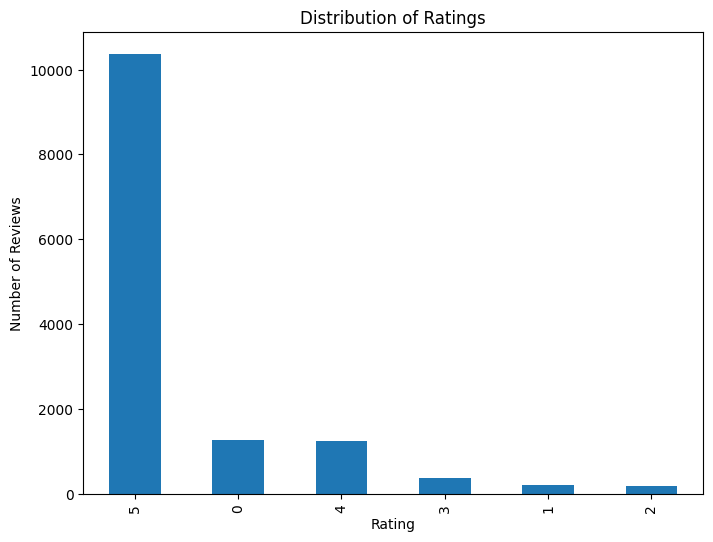

In [46]:
import matplotlib.pyplot as plt

print(exploration_data['Rating'].value_counts())
plt.figure(figsize=(8, 6))
exploration_data['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.show()


The rating of '5' is used most

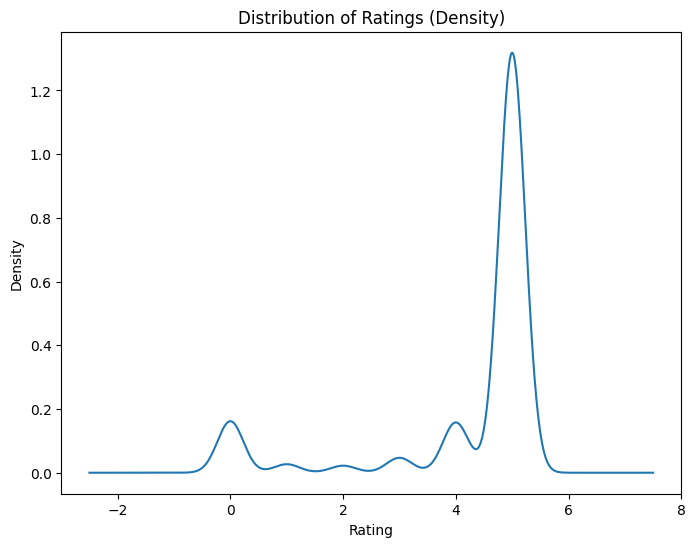

In [47]:
plt.figure(figsize=(8, 6))
exploration_data['Rating'].plot.density()
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings (Density)')
plt.show()

The density lingers at 5

In [48]:
exploration_data['Rating'].describe()

count    13636.000000
mean         4.288721
std          1.544839
min          0.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

We can see that the mean tends to 5

**Exploring numerical features**

Numerical features: ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']
Summary of ID :
 count    13636.000000
mean       121.085289
std        116.995633
min          0.000000
25%         45.000000
50%         91.000000
75%        148.000000
max        724.000000
Name: ID, dtype: float64


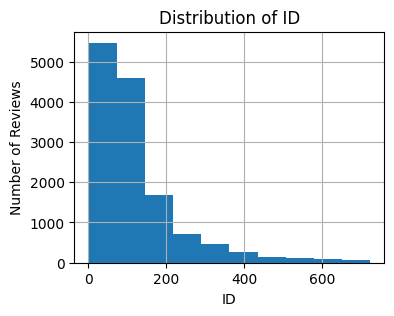

Summary of RecipeNumber :
 count    13636.000000
mean        38.624377
std         29.672351
min          1.000000
25%         12.000000
50%         33.000000
75%         63.000000
max        100.000000
Name: RecipeNumber, dtype: float64


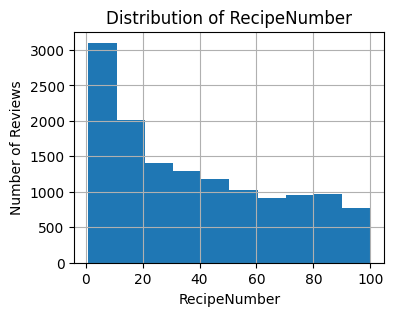

Summary of RecipeCode :
 count     13636.000000
mean      21785.990833
std       23883.189918
min         386.000000
25%        6504.000000
50%       14600.000000
75%       33121.000000
max      191775.000000
Name: RecipeCode, dtype: float64


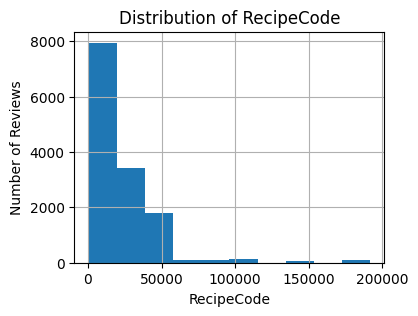

Summary of UserReputation :
 count    13636.000000
mean         2.160311
std         10.086424
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        510.000000
Name: UserReputation, dtype: float64


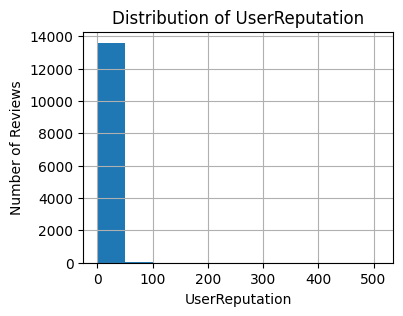

Summary of CreationTimestamp :
 count    1.363600e+04
mean     1.623713e+09
std      5.444020e+06
min      1.613035e+09
25%      1.622717e+09
50%      1.622718e+09
75%      1.622718e+09
max      1.665756e+09
Name: CreationTimestamp, dtype: float64


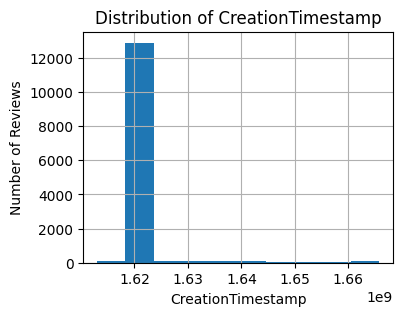

Summary of ReplyCount :
 count    13636.000000
mean         0.014520
std          0.137323
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: ReplyCount, dtype: float64


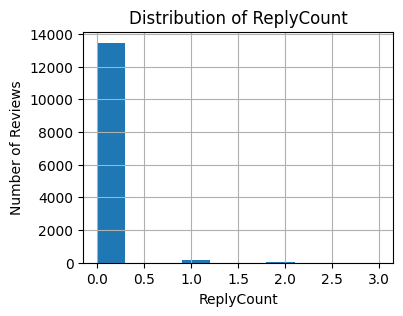

Summary of ThumbsUpCount :
 count    13636.000000
mean         1.098269
std          4.166487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         80.000000
Name: ThumbsUpCount, dtype: float64


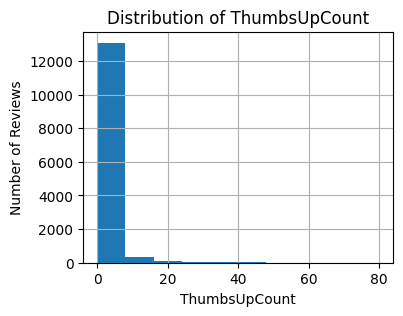

Summary of ThumbsDownCount :
 count    13636.000000
mean         0.543708
std          3.265660
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        126.000000
Name: ThumbsDownCount, dtype: float64


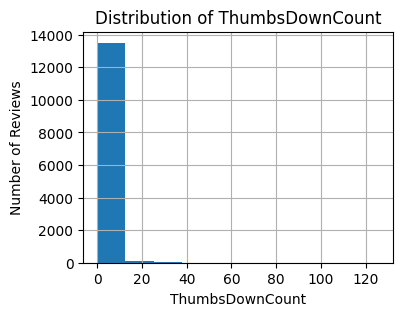

Summary of Rating :
 count    13636.000000
mean         4.288721
std          1.544839
min          0.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


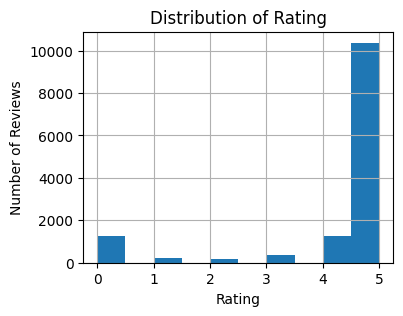

Summary of BestScore :
 count    13636.000000
mean       153.127897
std        140.986908
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        946.000000
Name: BestScore, dtype: float64


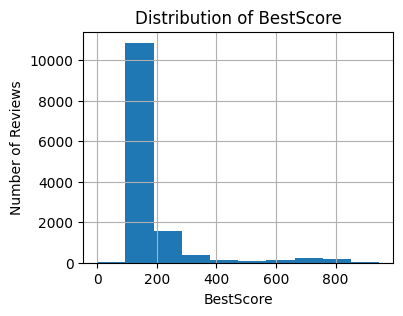

In [50]:
numerical_features = [col for col in exploration_data.columns if exploration_data[col].dtypes != 'object']
if len(numerical_features) > 0:
  print("Numerical features:", numerical_features)
  for col in numerical_features:
    print("Summary of", col, ":\n", exploration_data[col].describe())
    plt.figure(figsize=(4, 3))
    exploration_data[col].hist()
    plt.xlabel(col)
    plt.ylabel('Number of Reviews')
    plt.title('Distribution of ' + col)
    plt.show()

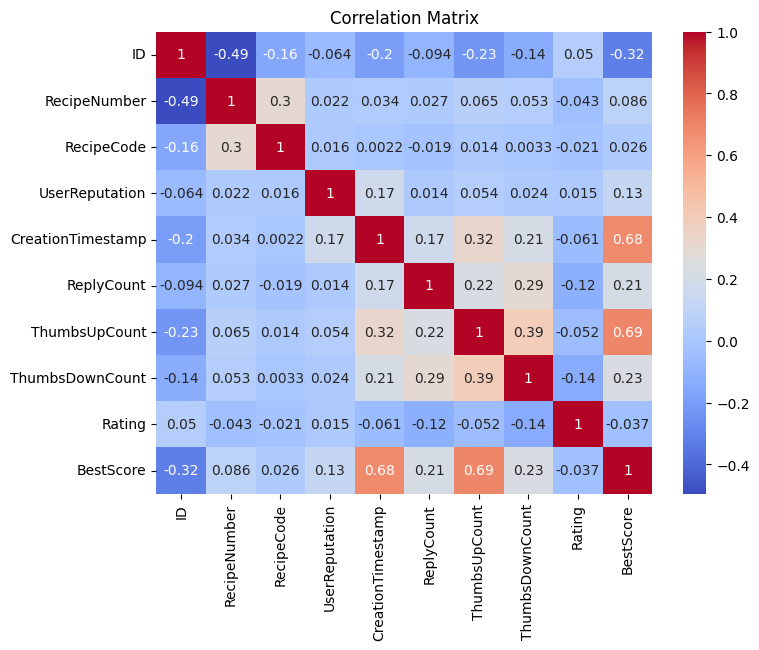

In [52]:
import seaborn as sns

if len(numerical_features) > 0:
  correlation = exploration_data[numerical_features].corr()

  plt.figure(figsize=(8, 6))
  sns.heatmap(correlation, annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix')
  plt.show()

Gives us a overall view of what features are correlated with the target variable

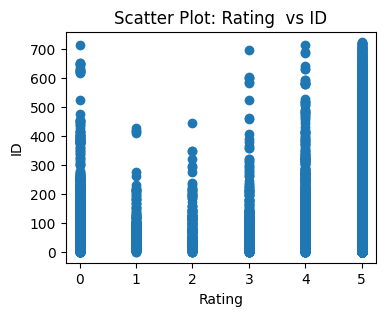

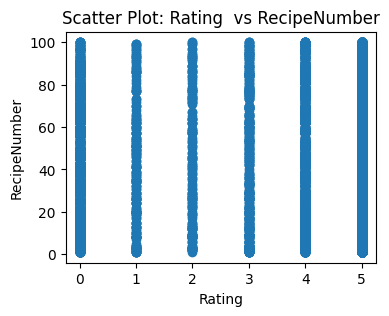

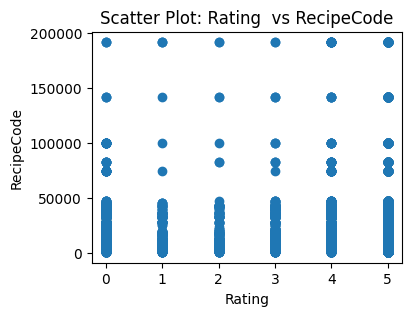

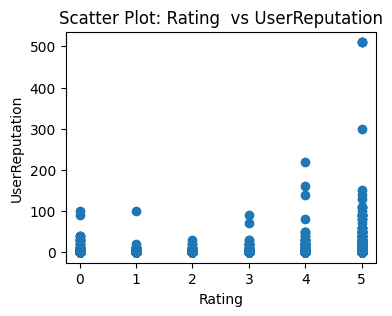

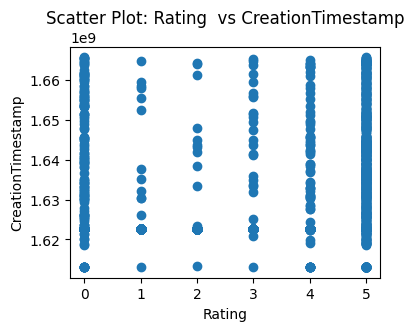

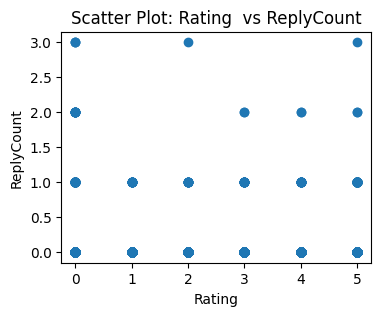

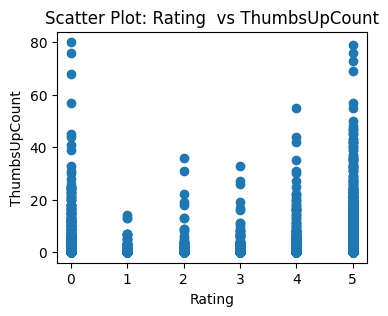

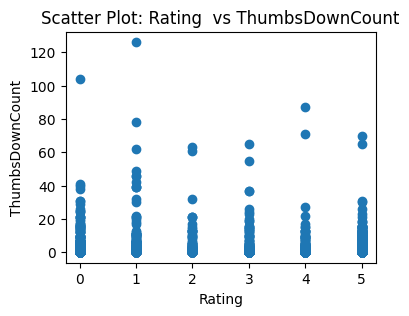

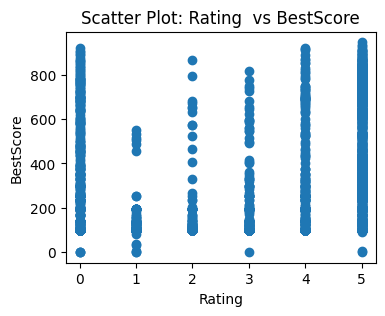

In [57]:
for col in numerical_features:
    if col!='Rating':
        plt.figure(figsize=(4, 3))
        plt.scatter(exploration_data['Rating'], exploration_data[col])
        plt.xlabel("Rating")
        plt.ylabel(col)
        plt.title('Scatter Plot: Rating ' + ' vs ' + col)
        plt.show()

**Exploring categorical features**

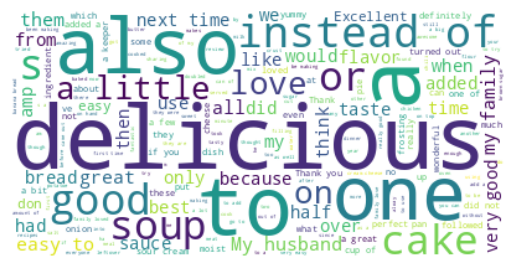

In [15]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in exploration_data['Recipe_Review'])
stopwords = ['recipe','made','make','used','will','didn\'t','it',
             'wa','i','t','I','have','This','in','the','and','with',
             'didn','that','was','but','for','again','just','is','so'
            ]
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

These words tend to have more importance than some others

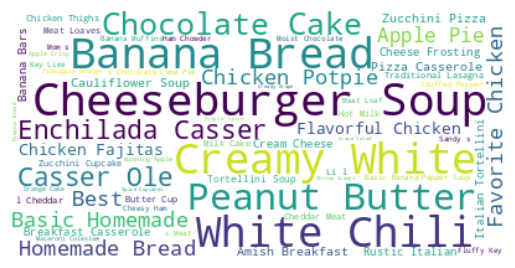

In [16]:
text = " ".join(str(review) for review in exploration_data['RecipeName'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Importing Necessasy Libraries**

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [18]:
#Dropping CommentID and CreationTimeStamp as it doesnt provide any insights
train.drop(["CommentID","CreationTimestamp"],axis=1,inplace=True)
test.drop(["CommentID","CreationTimestamp"],axis=1,inplace=True)

In [19]:
#Train Test Split on train data
X=train.drop("Rating",axis=1)
y=train["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=115)

**Preprocessing**

In [20]:
#Performing TF-IDF vectorization on RecipeName and Recipe_Review and 
#Label Encoder on UserID and UserName

vectorizer=TfidfVectorizer()
X_train_categorical=pd.DataFrame(vectorizer.fit_transform(X_train["RecipeName"].values.astype('U')).toarray())
X_test_categorical=pd.DataFrame(vectorizer.fit_transform(X_test["RecipeName"].values.astype('U')).toarray())
test_categorical=pd.DataFrame(vectorizer.transform(test["RecipeName"].values.astype('U')).toarray())

vectorizer=TfidfVectorizer()
X_train_text=pd.DataFrame(vectorizer.fit_transform(X_train["Recipe_Review"].values.astype('U')).toarray())
X_test_text=pd.DataFrame(vectorizer.fit_transform(X_train["Recipe_Review"].values.astype('U')).toarray())
test_text=pd.DataFrame(vectorizer.transform(test["Recipe_Review"].values.astype('U')).toarray())

label_encoder = LabelEncoder()
categ=["UserID", "UserName"]
X_train[categ] = X_train[categ].apply(label_encoder.fit_transform)
X_test[categ] = X_test[categ].apply(label_encoder.fit_transform)
test[categ] = test[categ].apply(label_encoder.fit_transform)



In [21]:
X_train = X_train.drop(['Recipe_Review','RecipeName'],axis=1)
X_test = X_test.drop(['Recipe_Review','RecipeName'],axis=1)
test = test.drop(['Recipe_Review','RecipeName'],axis=1)

X_train = pd.concat([X_train.reset_index(drop=True),X_train_text,X_train_categorical], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True),X_test_text,X_test_categorical], axis=1)
test = pd.concat([test, test_text, test_categorical], axis=1)

In [22]:
#Using Standard Scaler on the Dataset
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
test.columns = test.columns.astype(str)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test=scaler.transform(test)

Logistic Regression

In [25]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

model = GridSearchCV(LogisticRegression(multi_class="ovr"), param_grid, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

best_model = model.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

best_params = model.best_params_
print("Best params: ", best_params)

cm = multilabel_confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

Support Vector Machine

In [ ]:
param_grid_svm = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01]
}

svm = GridSearchCV(SVC(), param_grid_svm, scoring='accuracy', cv=5)
svm.fit(X_train, y_train)

best_model = svm.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

best_params = svm.best_params_
print("Best params: ", best_params)

cm = multilabel_confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test, y_pred))

KNN Classifier

In [ ]:
param_grid_knn = {
    'n_neighbors': range(1, 20),
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='f1_macro', cv=5)
knn.fit(X_train, y_train)

best_model = knn.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

best_params = knn.best_params_
print("Best params: ", best_params)

cm = multilabel_confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test, y_pred))

Decision Tree Classifier

In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring='accuracy', cv=5)
dt.fit(X_train, y_train)

best_model = dt.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

best_params = dt.best_params_
print("Best params: ", best_params)

cm = multilabel_confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test, y_pred))

Random Forest Classifier

In [ ]:
param_grid_rf = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
rf = GridSearchCV(rf_model, param_grid_rf, scoring='accuracy', cv=5)
rf.fit(X_train, y_train)

best_model = rf.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

best_params = rf.best_params_
print("Best params: ", best_params)

cm = multilabel_confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test, y_pred))

Histogram-Based GradientBoosting Classifier

In [ ]:
param_grid_hist = {
    "learning_rate": [0.1, 0.01],
    "tol": [1e-6, 1e-7, 1e-8],
    "max_depth": [3, 5]
}
hist = GridSearchCV(HistGradientBoostingClassifier(),param_grid_hist,scoring='accuracy', cv=5)
hist.fit(X_train,y_train)

best_model = hist.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

best_params = hist.best_params_
print("Best params: ", best_params)

cm = multilabel_confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test, y_pred))

Light Gradient Boosting Classifier

In [ ]:
param_grid = {
    'boosting_type':['gbdt','dart'],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200]
}

lgbm_model = LGBMClassifier(objective='multiclass')
lgbm = GridSearchCV(lgbm_model, param_grid, scoring='accuracy', cv=5)
lgbm.fit(X_train, y_train)

best_model = lgbm.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

best_params = lgbm.best_params_
print("Best params: ", best_params)

cm = multilabel_confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test, y_pred))

In [ ]:
submission=best_model.predict(test)
id = [i for i in range(1,4547)]
sub=pd.DataFrame(id,columns=['ID'])
sub["Rating"]=submission
sub.to_csv("submission.csv",encoding="utf-8",index=False)

XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

param_grid = {
    'eta': [0.05,0.1,0.2],
    'gamma': [0],
    'n_estimators': [500,1000],
    'objective': ['multi:softmax'],
    'min_child_weight': [4,6],
    'max_depth': [4,6,8],
    'eval_metric': ['mlogloss'],
}

xgb_model = XGBClassifier()
xgb = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
xgb.fit(X_train, y_train)

best_model = xgb.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

best_params = xgb.best_params_
print("Best params: ", best_params)

cm = multilabel_confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test, y_pred))